# A little more Python
## [still while playing with a simulation of the Luria-Delbrück experiment]

Now we're going to add a mutation function. Here, we're really only dealing with two genotypes, `0` and `1`, but you could imagine extending this in all sorts of ways!


### We'll start by importing our libraries again

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Now, let's bring in the code we wrote before
(I just took out the print statements)

In [2]:
prob_repro = 0.50
num_replicates = 10
num_generations = 10 #let's run a little longer this time

populations = [[0] for rep_idx in range(num_replicates)]
pop_sizes = [[] for rep_idx in range(num_replicates)]

for rep in range(num_replicates): 
    this_population = populations[rep]
    
    for generation in range(num_generations):
        for pop_idx in range(len(this_population)):
            if np.random.rand() < prob_repro:
                #the organism at pop_idx location in our array gets to reproduce! 
                this_population.append(this_population[pop_idx])

        pop_sizes[rep].append(len(this_population))


### The line we need to look at is where we put the new organism into the population:
`this_population.append(this_population[pop_idx])`

### Let's write a *function* that will help keep these nested loops easy(ish) to read.
We can call it `mutation_function` and it'll take in the genotype of our organism (0, or 1), and return a mutant genotype (with probability `mut_prob`), or the same genotype it was given (with probability `1-mut_prob`). 

Let's make `mut_prob` a parameter to our mutation function. That way it'll be easy if we want to change the mutation rate later on! 

In [3]:
def mutation_function(org, mut_prob):
    new_org = org
    #We mutate! 
    if np.random.rand() < mut_prob:
        if(org == 0):
            new_org = 1
        else:
            new_org = 0
    return new_org
            
    

## Let's quickly test our mutation function to see if it is working!

We can just call our mutation_function a bunch of times, and plot a histogram of the genotype it returns.

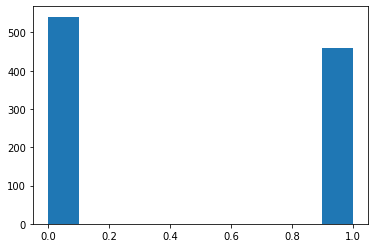

In [4]:
test_array = []

for i in range(1000):
    test_array.append(mutation_function(0, 0.5))
    
plt.hist(test_array)
plt.show()

## Now let's try changing the mutation probability! 

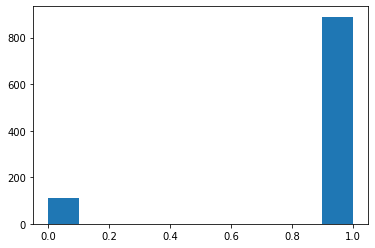

In [5]:
test_array = []

for i in range(1000):
    test_array.append(mutation_function(0, 0.9))
    
plt.hist(test_array)
plt.show()

## Awesome, it looks like it works the way we expect

So let's add it to our full simulation now.

We'll also add a variable for the mutation probability that we'll just pass into our new `mutation_function`.

In [6]:
#20% chance of a mutation occuring whenever an organism replicates
prob_mutation = 0.2

prob_repro = 0.50
num_replicates = 10
num_generations = 10 #let's run a little longer this time

populations = [[0] for rep_idx in range(num_replicates)]
pop_sizes = [[] for rep_idx in range(num_replicates)]

for rep in range(num_replicates): 
    this_population = populations[rep]
    
    for generation in range(num_generations):
        for pop_idx in range(len(this_population)):
            if np.random.rand() < prob_repro:
                org_to_add = mutation_function(this_population[pop_idx], mut_prob=prob_mutation)
                this_population.append(org_to_add)

        pop_sizes[rep].append(len(this_population))


## Let's look at the population array and see if we notice some mutants!

In [7]:
print(populations)

[[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], [0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 

## They're there! Maybe an easier way to summarize all this is to calculate the proportion of the population made up by mutant (`1`) genotypes. 

We can take advantage that adding together a bunch of `1`s and `0`s will sum to the count of `1`s in the population!

Remember that `populations` holds a list-of-lists, where each sublist is the organisms in one replicate population. So, we can loop through each of these sublists to calculate the proportion. 


In [8]:
#Just the sum, not the proportion!
for replicate_pop in populations:
    print(sum(replicate_pop))

34
12
1
24
13
10
6
18
13
64


In [9]:
#We need to divide this count by the size of the population to get the proportion! 
for replicate_pop in populations:
    print(sum(replicate_pop)/len(replicate_pop))

0.40963855421686746
0.375
0.3333333333333333
0.2553191489361702
0.30952380952380953
0.24390243902439024
0.3157894736842105
0.42857142857142855
0.3170731707317073
0.5


## But, we could have done this with a list comprehension!

In [10]:
proportion_mutants = [sum(rep_pop)/len(rep_pop) for rep_pop in populations]
print(proportion_mutants)

[0.40963855421686746, 0.375, 0.3333333333333333, 0.2553191489361702, 0.30952380952380953, 0.24390243902439024, 0.3157894736842105, 0.42857142857142855, 0.3170731707317073, 0.5]


### Let's put this all together

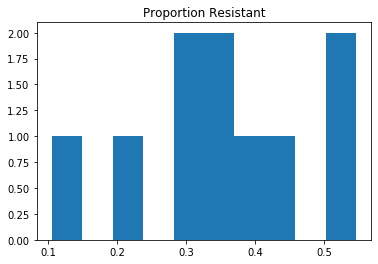

In [11]:
#20% chance of a mutation occuring whenever an organism replicates
prob_mutation = 0.2

prob_repro = 0.50
num_replicates = 10
num_generations = 10 #let's run a little longer this time

populations = [[0] for rep_idx in range(num_replicates)]
pop_sizes = [[] for rep_idx in range(num_replicates)]

for rep in range(num_replicates): 
    this_population = populations[rep]
    
    for generation in range(num_generations):
        for pop_idx in range(len(this_population)):
            if np.random.rand() < prob_repro:
                org_to_add = mutation_function(this_population[pop_idx], mut_prob=prob_mutation)
                this_population.append(org_to_add)

        pop_sizes[rep].append(len(this_population))

proportion_mutants = [sum(rep_pop)/len(rep_pop) for rep_pop in populations]

plt.hist(proportion_mutants)
plt.title("Proportion Resistant")
plt.show()

## Well, that's not exactly pretty. 

Part of the problem is that we only have 10 values, so we can't ***really*** tell much. Let's try this again with *100* replicates, and then again with *10,000*!

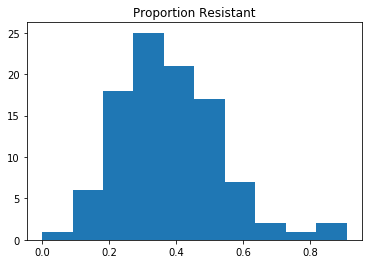

In [12]:
#20% chance of a mutation occuring whenever an organism replicates
prob_mutation = 0.2

prob_repro = 0.50
num_replicates = 100
num_generations = 10 #let's run a little longer this time

populations = [[0] for rep_idx in range(num_replicates)]
pop_sizes = [[] for rep_idx in range(num_replicates)]

for rep in range(num_replicates): 
    this_population = populations[rep]
    
    for generation in range(num_generations):
        for pop_idx in range(len(this_population)):
            if np.random.rand() < prob_repro:
                org_to_add = mutation_function(this_population[pop_idx], mut_prob=prob_mutation)
                this_population.append(org_to_add)

        pop_sizes[rep].append(len(this_population))

proportion_mutants = [sum(rep_pop)/len(rep_pop) for rep_pop in populations]

plt.hist(proportion_mutants)
plt.title("Proportion Resistant")
plt.show()

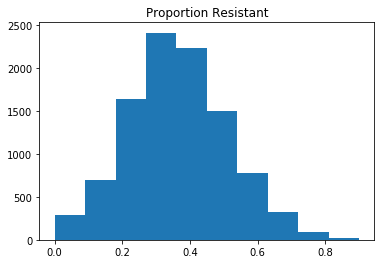

In [13]:
#20% chance of a mutation occuring whenever an organism replicates
prob_mutation = 0.2

prob_repro = 0.50
num_replicates = 10000
num_generations = 10 #let's run a little longer this time

populations = [[0] for rep_idx in range(num_replicates)]
pop_sizes = [[] for rep_idx in range(num_replicates)]

for rep in range(num_replicates): 
    this_population = populations[rep]
    
    for generation in range(num_generations):
        for pop_idx in range(len(this_population)):
            if np.random.rand() < prob_repro:
                org_to_add = mutation_function(this_population[pop_idx], mut_prob=prob_mutation)
                this_population.append(org_to_add)

        pop_sizes[rep].append(len(this_population))

proportion_mutants = [sum(rep_pop)/len(rep_pop) for rep_pop in populations]

plt.hist(proportion_mutants)
plt.title("Proportion Resistant")
plt.show()

## Notice how the distributions are much more resonable looking? 
This is the reason why you might hear people talk about *small sample sizes*, needing more replicates, or having low statistical power. Without enough samples, it's hard to know what the underlying distribution really looks like! 

## So, this is what the distribution of the *Proportion Resistant* looks like with a stochastic growth model and RANDOM mutations. What would it look like if you had DIRECTED mutations? 

That's what you'll be working on next!